In [1]:
!pip install pyLDAvis

In [2]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.4 MB/s 
     |████████████████████████████████| 9.5 MB 37.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
!pip install keras_visualizer

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import plotly.express as px
import urllib
import lxml
from tqdm import tqdm
import os
import glob
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics import mean_squared_error
import plotly.express as px
from keras_visualizer import visualizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from sklearn import model_selection
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
folder=["/content/final_docs.txt"]

for file in folder:
    with open(file,  encoding="iso-8859-1") as fp:
        soup_page = BeautifulSoup(fp, 'html.parser')
    
    search_results = soup_page.find_all('div',{"class": "title"})
    search_date = soup_page.find_all('td', {"class" : "item_date"})
    for result, dates in zip(search_results, search_date):
      try:
        fix = result.find('a')['href']
        link = 'https://www.bis.org'+fix
        response = urllib.request.urlopen(link)
        html_doc = response.read()
        soup = BeautifulSoup(html_doc, 'html.parser')
        text1 = soup.find('div', {'id':'cmsContent'}).text
        date = soup.find('div', {'class': 'date'}).text
        #print(date)
        with open('/content/drive/MyDrive/DDE_Prof_Juri/'+fix.split('/')[-1].split('.')[0]+'.txt', 'w' , encoding="iso-8859-1") as f:
          f.write(text1)
        #with open(fix.split('/')[-1].split('.')[0]+'.txt', 'w', encoding='utf-8') as d:
          #d.write(date) 
      except:
        pass

In [8]:
# Step 1: get a list of all text files in target directory
my_dir = "/content/drive/MyDrive/DDE_Prof_Juri/"
filelist = []
filesList = []
os.chdir( my_dir )

# Step 2: Build up list of files:
for files in glob.glob("*.txt"):
    fileName, fileExtension = os.path.splitext(files)
    filelist.append(fileName) #filename without extension
    filesList.append(files) #filename with extension

# Step 3: Build up the basket:
bag_of_speech=[]
for i in range(0,len(filesList)):
  str = open(my_dir+filesList[i], 'r').read().replace('\n', '')
  bag_of_speech.append(str)

In [9]:
type(bag_of_speech)

list

In [10]:
df_speech=pd.DataFrame(list(bag_of_speech), columns={'speeches'})

In [11]:
df_speech

,speeches
0,"As prepared for deliveryGood afternoon, and we..."
1,IntroductionThank you to the American Bankers ...
2,"As prepared for deliveryGood afternoon, everyo..."
3,Seventeen months have passed since the U.S. ec...
4,"Thank you, Gigi and Scott, and thanks to every..."
...,...
682,It is a great pleasure to have the opportunity...
683,It is a pleasure to offer a few remarks at thi...
684,"The thoughts that follow are my own, and are n..."
685,Good afternoon. I am delighted to have the opp...


In [12]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [13]:
# Creating final box of words:
#nltk.download('stopwords')
#from nltk.corpus import stopwords
def final_text(text):
    stopword = STOPWORDS
    return " ".join([word for word in re.sub(r'[^a-zA-Z\s]', "",text).lower().split() if word not in stopword])

# # Download Wordnet through NLTK in python console:
def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(text)

In [14]:
for i in tqdm(df_speech.itertuples()):
    df_speech.at[i[0], 'cleaned_speech'] = final_text(i[1])

df_speech['final_cleaned_speech'] = df_speech.cleaned_speech.apply(lemmatization)

687it [00:00, 1294.84it/s]


In [15]:
df_speech

,speeches,cleaned_speech,final_cleaned_speech
0,"As prepared for deliveryGood afternoon, and we...",prepared deliverygood afternoon welcome im joh...,prepared deliverygood afternoon welcome im joh...
1,IntroductionThank you to the American Bankers ...,introductionthank american bankers association...,introductionthank american bankers association...
2,"As prepared for deliveryGood afternoon, everyo...",prepared deliverygood afternoon thank st lawre...,prepared deliverygood afternoon thank st lawre...
3,Seventeen months have passed since the U.S. ec...,seventeen months passed economy faced force co...,seventeen months passed economy faced force co...
4,"Thank you, Gigi and Scott, and thanks to every...",thank gigi scott thanks work bringing today pa...,thank gigi scott thanks work bringing today pa...
...,...,...,...
682,It is a great pleasure to have the opportunity...,great pleasure opportunity speak today remarks...,great pleasure opportunity speak today remarks...
683,It is a pleasure to offer a few remarks at thi...,pleasure offer remarks conference marking th a...,pleasure offer remarks conference marking th a...
684,"The thoughts that follow are my own, and are n...",thoughts follow necessarily shared colleagues ...,thoughts follow necessarily shared colleagues ...
685,Good afternoon. I am delighted to have the opp...,good afternoon delighted opportunity participa...,good afternoon delighted opportunity participa...


In [16]:
#list(df_speech['cleaned_speech'])

Word counts

In [17]:
speech_box=list(df_speech['final_cleaned_speech'])
#  combine all the strings
speech_box=''.join(speech_box)

In [18]:
import nltk
nltk.download('averaged_perceptron_tagger')
# word count
# 1. Economy
# 2. Competition
# 3. Inflation
# 4. gdp
# 5. Unemployment

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(speech_box)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [45]:
import re
from collections import Counter
filtered = [w for w in tokens]
counts = Counter(filtered)
#counts

In [47]:
# few observations
# Highest frequency word
# Lowest frequency word
vault=[]
for i in range(0,len(list(counts.keys()))):
  key_vals=counts[list(counts.keys())[i]]
  vault.append(key_vals)
#print(vault)
max_val=max(vault)
min_val=min(vault)

In [48]:
print("The most frequent word is:",list(counts.keys())[list(counts.values()).index(max_val)])
print("The least frequent word is:",list(counts.keys())[list(counts.values()).index(min_val)])

The most frequent word is: financial
The least frequent word is: yorkim


In [49]:
from numpy.ma.core import sort
sorted_vault = sort(vault)

In [50]:
sorted_vault

array([   1,    1,    1, ..., 6172, 6493, 8676])

In [51]:
top_5= sorted_vault[-5:]
top_10= sorted_vault[-10:]

In [52]:
top_5

array([4489, 5331, 6172, 6493, 8676])

In [53]:
top_5_keys=[]
for i in range(0,len(top_5)):
  keys_t5=list(counts.keys())[list(counts.values()).index(top_5[i])]
  #val_t10=
  top_5_keys.append(keys_t5)
  print(list(counts.keys())[list(counts.values()).index(top_5[i])], top_5[i])

reserve 4489
market 5331
policy 6172
federal 6493
financial 8676


In [54]:
top_5_keys
t5df={'Keys': top_5_keys, "Frequency": top_5}
t5df=pd.DataFrame(t5df)
t5df

,Keys,Frequency
0,reserve,4489
1,market,5331
2,policy,6172
3,federal,6493
4,financial,8676


In [55]:
import plotly.express as px
fig_1 = px.bar(t5df, x='Keys', y='Frequency')
fig_1.show()

In [56]:
top_10_keys=[]
for i in range(0,len(top_10)):
  keys_t10=list(counts.keys())[list(counts.values()).index(top_10[i])]
  #val_t10=
  top_10_keys.append(keys_t10)
  print(list(counts.keys())[list(counts.values()).index(top_10[i])], top_10[i])

bank 3363
monetary 3827
economic 3942
banks 4278
rate 4286
reserve 4489
market 5331
policy 6172
federal 6493
financial 8676


In [57]:
top_10_keys
t10df={'Keys': top_10_keys, "Frequency": top_10}
t10df=pd.DataFrame(t10df)
t10df

,Keys,Frequency
0,bank,3363
1,monetary,3827
2,economic,3942
3,banks,4278
4,rate,4286
5,reserve,4489
6,market,5331
7,policy,6172
8,federal,6493
9,financial,8676


In [31]:
fig_2 = px.bar(t10df, x='Keys', y='Frequency')
fig_2.show()

# Visualization: Wordcloud

In [32]:
# Import the wordcloud library
from wordcloud import WordCloud

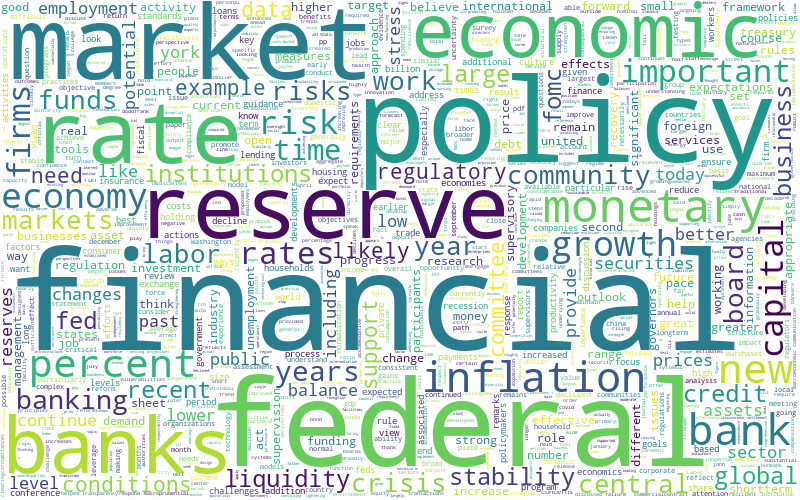

In [62]:
# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 500,background_color="white", max_words=1000, contour_width=10, contour_color='red')
# Generate a word cloud
wordcloud.generate_from_frequencies(counts)
# Visualize the word cloud
wordcloud.to_image()

# Latent Dirichilet Allocation

In [63]:
nltk.download('punkt')
df_speech['tokenized'] = df_speech.apply(lambda row: nltk.word_tokenize(row['final_cleaned_speech']), axis=1)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [64]:
df_speech['tokenized']

0      [prepared, deliverygood, afternoon, welcome, i...
1      [introductionthank, american, bankers, associa...
2      [prepared, deliverygood, afternoon, thank, st,...
3      [seventeen, months, passed, economy, faced, fo...
4      [thank, gigi, scott, thanks, work, bringing, t...
                             ...                        
682    [great, pleasure, opportunity, speak, today, r...
683    [pleasure, offer, remarks, conference, marking...
684    [thoughts, follow, necessarily, shared, collea...
685    [good, afternoon, delighted, opportunity, part...
686    [let, start, thanking, organizers, including, ...
Name: tokenized, Length: 687, dtype: object

In [92]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(df_speech['tokenized'])
id2word.filter_extremes(no_below=15, no_above=0.4, keep_n=10000)
# Create Corpus
texts = df_speech['tokenized']
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [93]:
from gensim.models import CoherenceModel

In [97]:
def choose_num_topics(initial, end, steps):
  c_score=[]
  #p_score=[]
  for i in range(initial, end, steps):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=i)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df_speech['tokenized'], dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    #perplexity=lda_model.log_perplexity(corpus)
    c_score.append(coherence_lda)
    #p_score.append(perplexity)
  return c_score

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
c_scores=choose_num_topics(5,30,1)
c_scores

[0.20265749908036773,
 0.24247403122946812,
 0.21371107469036218,
 0.20087873671566617,
 0.21052037013609182,
 0.23389928769594776,
 0.2424047739271994,
 0.21062492498564112,
 0.22532951668309312,
 0.230033523059301,
 0.23075494877584993,
 0.22193861277350863,
 0.23443932386962002,
 0.23823544742831107,
 0.21836900003339355,
 0.24221007283558632,
 0.25052696649784295,
 0.22108408496672993,
 0.2287693854209933,
 0.24107899720130724,
 0.25349795859757807,
 0.2682616483498412,
 0.21697855294100427,
 0.23552503089513546,
 0.24507407265836806]

In [100]:
max(c_scores)

0.2682616483498412

In [104]:
num_of_topics=[i for i in range(5,30,1)]


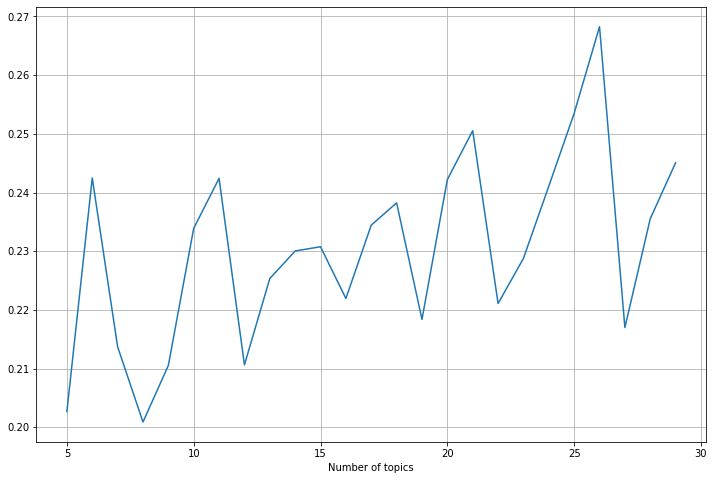

In [105]:
# Show graph
plt.figure(figsize=(12,8))
plt.plot(num_of_topics,c_scores)
plt.xlabel('Number of topics')
plt.grid()
plt.show()

In [116]:
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')
# number of topics
num_topics = 27
# Build LDA model
lda_model_final = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the relationship between the keywords
pprint(lda_model_final.print_topics(num_words=30))
doc_lda = lda_model_final[corpus]

[(14,
  '0.005*"inflation" + 0.004*"firms" + 0.004*"international" + '
  '0.003*"liquidity" + 0.003*"participants" + 0.003*"prices" + '
  '0.003*"development" + 0.003*"management" + 0.003*"foreign" + 0.003*"labor" '
  '+ 0.003*"trade" + 0.003*"industry" + 0.003*"services" + 0.002*"assets" + '
  '0.002*"regulatory" + 0.002*"housing" + 0.002*"community" + '
  '0.002*"securities" + 0.002*"balance" + 0.002*"economies" + 0.002*"small" + '
  '0.002*"stress" + 0.002*"culture" + 0.002*"regulation" + 0.002*"fomc" + '
  '0.002*"outlook" + 0.002*"pace" + 0.002*"treasury" + 0.002*"costs" + '
  '0.002*"expectations"'),
 (1,
  '0.008*"firms" + 0.005*"regulatory" + 0.004*"liquidity" + 0.004*"community" '
  '+ 0.004*"inflation" + 0.003*"fomc" + 0.003*"stress" + 0.003*"requirements" '
  '+ 0.003*"debt" + 0.003*"regulation" + 0.003*"labor" + 0.003*"compliance" + '
  '0.003*"international" + 0.003*"small" + 0.002*"libor" + 0.002*"supervisory" '
  '+ 0.002*"companies" + 0.002*"foreign" + 0.002*"supervisio

In [117]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_final, texts=df_speech['tokenized'], dictionary=id2word)
coherence_score = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_score)

Coherence Score:  0.25341811704644807


In [109]:
import pyLDAvis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [118]:
# Visualize the topics
pyLDAvis.enable_notebook()
import pyLDAvis.gensim_models as gensimvis
result = gensimvis.prepare(lda_model_final, corpus, id2word)
pyLDAvis.save_html(result,'LDA Model.html')
result

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
26    -0.019613  0.007470       1        1  12.077363
18    -0.014559 -0.004614       2        1  11.074383
19     0.019343 -0.006284       3        1  10.520777
10     0.022688  0.008263       4        1   8.737790
1      0.008588  0.001429       5        1   7.362150
2      0.002081 -0.010936       6        1   6.860204
22     0.013483  0.004238       7        1   6.237649
6     -0.007954 -0.011904       8        1   4.601157
14     0.002650 -0.001389       9        1   3.914854
0      0.009836 -0.002040      10        1   3.884616
23     0.004929 -0.013652      11        1   3.607496
3     -0.010516  0.010130      12        1   3.224762
7     -0.015700 -0.000281      13        1   2.907007
9     -0.005332 -0.000960      14        1   2.017676
13    -0.001433  0.001496      15        1   1.831766
4     -0.009457 -0.003960      16        1   1.594946
12    -0.008454  0.002020      17        1   1.552114
25     0.001623  0.003524      18        1   1.472221
11    -0.000325  0.006389      19        1   1.184355
8      0.001316  0.005145      20        1   1.125939
5     -0.005249 -0.000304      21        1   1.035448
16     0.002254  0.005192      22        1   0.966909
21     0.013497  0.002049      23        1   0.616985
17     0.001012  0.002527      24        1   0.550410
24    -0.008850  0.001508      25        1   0.478930
15     0.006158 -0.001088      26        1   0.323985
20    -0.002016 -0.003967      27        1   0.238109, topic_info=           Term         Freq        Total Category  logprob  loglift
707   inflation  3205.000000  3205.000000  Default  30.0000  30.0000
1121      firms  2653.000000  2653.000000  Default  29.0000  29.0000
45    community  1874.000000  1874.000000  Default  28.0000  28.0000
714       labor  1584.000000  1584.000000  Default  27.0000  27.0000
1177  liquidity  1643.000000  1643.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
835      target     2.100577   751.517870  Topic27  -6.2684   0.1603
45    community     3.099507  1874.073890  Topic27  -5.8793  -0.3644
215      stress     2.813369  1489.910659  Topic27  -5.9762  -0.2319
1553   treasury     2.190077   874.072259  Topic27  -6.2266   0.0510
762      prices     2.194068  1134.795781  Topic27  -6.2248  -0.2083

[2016 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
239       1  0.134405  ability
239       2  0.074670  ability
239       3  0.136539  ability
239       4  0.106671  ability
239       5  0.096004  ability
...     ...       ...      ...
3772     19  0.041411      zlb
3772     20  0.008282      zlb
3772     21  0.008282      zlb
3772     24  0.008282      zlb
3772     26  0.008282      zlb

[19350 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[27, 19, 20, 11, 2, 3, 23, 7, 15, 1, 24, 4, 8, 10, 14, 5, 13, 26, 12, 9, 6, 17, 22, 18, 25, 16, 21])

# Forecasting

In [ ]:
data=pd.read_csv('/content/T10YIE.csv')
print(data.shape)
data.head()

(3580, 2)


,DATE,T10YIE
0,1/2/2008,2.32
1,1/3/2008,2.33
2,1/4/2008,2.32
3,1/7/2008,2.29
4,1/8/2008,2.29


Preprocessing:

In [ ]:
data=data[data['T10YIE']!='.']
data=data.dropna().reset_index(drop=True)
print(data.isnull().sum())
print(data.shape)

DATE      0
T10YIE    0
dtype: int64
(3435, 2)


Exploratory data analysis

In [ ]:
data['T10YIE']=data['T10YIE'].astype(float)

In [ ]:
fig = px.area(y=data["T10YIE"],x=data['DATE'],title = 'Daily inflation rate of USA',labels={'x':'Year','y':'Inflation'})
fig.show()

Observation: We can sense some sort of seasonality in the data

In [ ]:

def moving_average(days, column1):

  # Rolling Mean on Time series

  data['{}_days_simple_moving_average of inflation'.format(days)]=data[column1].rolling(window=days).mean()

  # Exponential Moving average

  data['{}_days_exponential_moving_average of inflation'.format(days)]=data[column1].ewm(span=days).mean()
  

  # Rolling standard deviation
  data['{}_days_rolling_std of inflation'.format(days)]=data[column1].rolling(window=days).std()

  # Plot the data:

  fig, ax = plt.subplots(1, figsize=(15,7))
  
  # closing values
  ax.plot(data[column1], color='red', linewidth=1, label='inflation')
  ax.plot(data['{}_days_simple_moving_average of inflation'.format(days)], color='green', linewidth=1, label='simple moving average')
  ax.plot(data['{}_days_exponential_moving_average of inflation'.format(days)], color='blue', linewidth=1, label=' exponential moving average')
  ax.plot(data['{}_days_rolling_std of inflation'.format(days)], color='black', linewidth=2, label=' rolling std')
  ax.grid()
  #ax.set_title('{} days moving and exponential avegage'.format(days))
  ax.legend()
  
  plot=fig.tight_layout()
  return plot

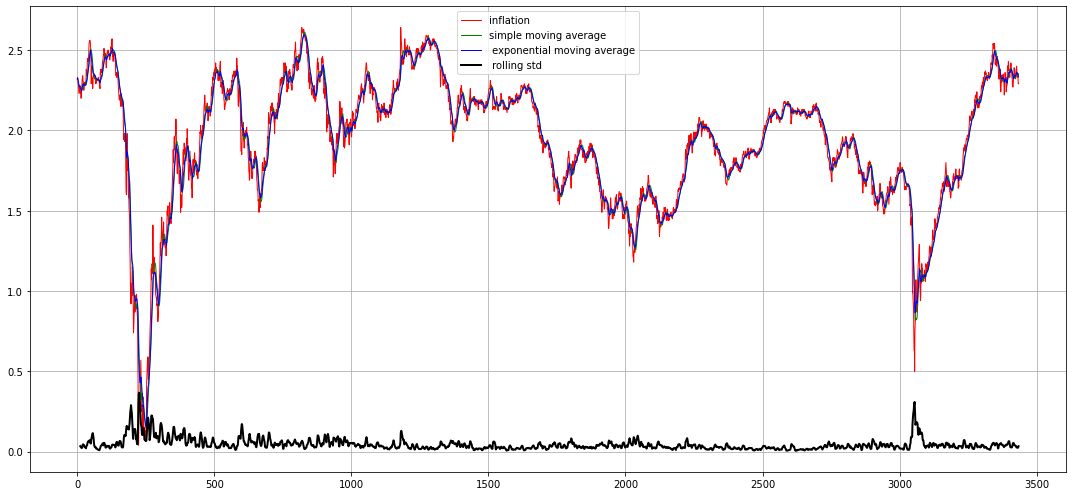

In [ ]:
# 12 days moving average
_=moving_average(12,'T10YIE')

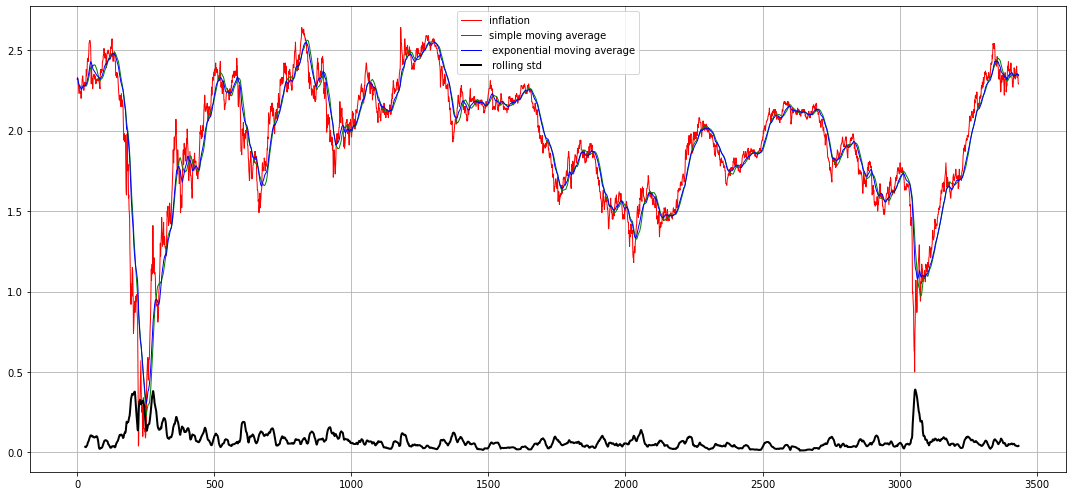

In [ ]:
# 30 days moving average
_=moving_average(30,'T10YIE')

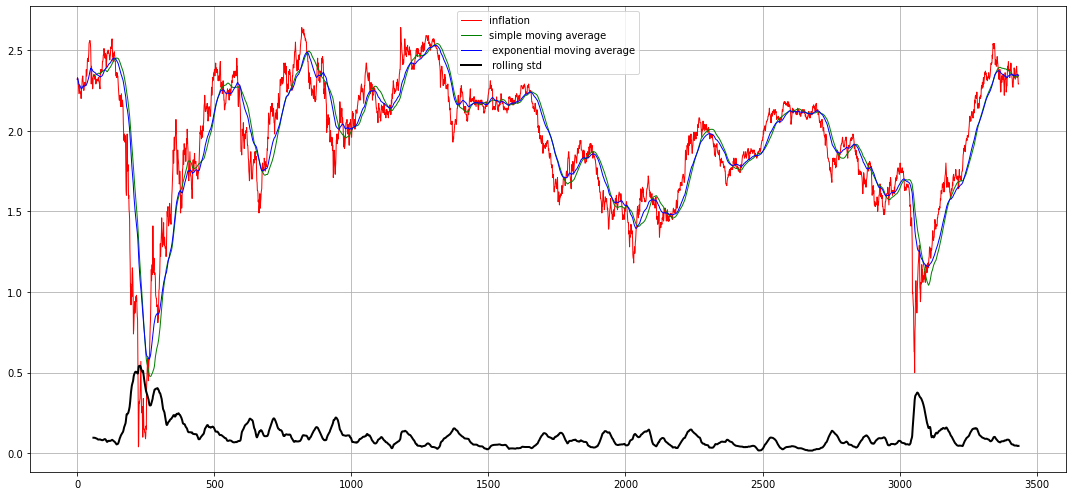

In [ ]:
# 60 days moving average
_=moving_average(60,'T10YIE')

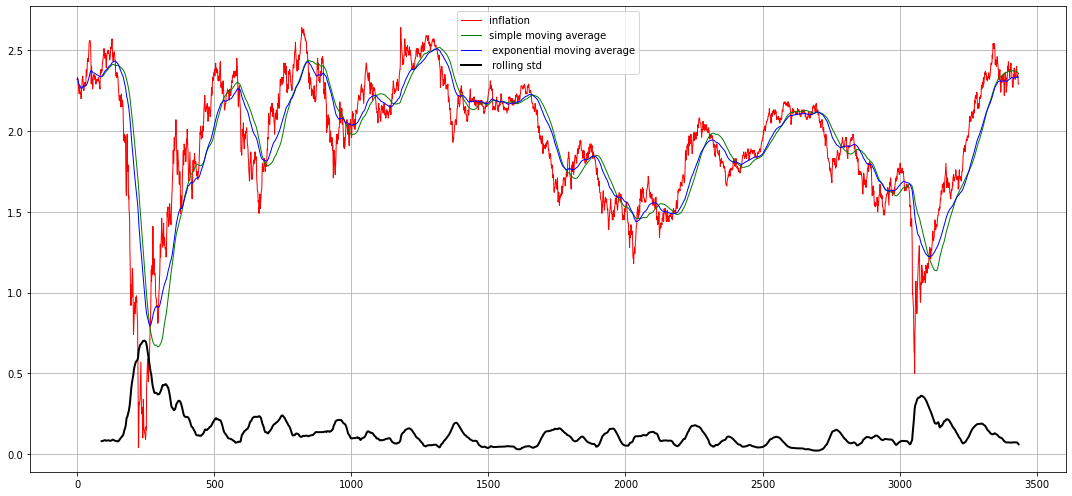

In [ ]:
# 90 days moving average
_=moving_average(90,'T10YIE')

In [ ]:
import plotly.graph_objects as go

In [ ]:
trace0 = go.Violin(
    name = "Inflation",
    y = data["T10YIE"],box_visible=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
)

layout = go.Layout(
    autosize=False,
    width=700,
    height=500
)
df= [trace0]
fig = go.Figure(data=df, layout=layout)
#plotly.offline.iplot(data)
fig.show()

### Models to check
1. LSTM
2. LSTM Autoencoder

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def is_stationary(data):
  alpha=0.05
  outcome=adfuller(data)
  print("test statistic:", outcome[0])
  print("P-value:",outcome[1])
  if outcome[1]<alpha:
    print("VERDICT:\n As the p-value is less than 0.05, we reject the null hypothesis and conclude that the data is stationary.")
  else:
    print("VERDICT:\nAs the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that the data is non-stationary.")

In [ ]:
is_stationary(data['T10YIE'])

test statistic: -3.1930852107273764
P-value: 0.020388439560588334
VERDICT:
 As the p-value is less than 0.05, we reject the null hypothesis and conclude that the data is stationary.


In [ ]:
data1=data.iloc[:,0:2]

In [ ]:
data1.head()

,DATE,T10YIE
0,1/2/2008,2.32
1,1/3/2008,2.33
2,1/4/2008,2.32
3,1/7/2008,2.29
4,1/8/2008,2.29


### Seasonality check

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
data1.set_index('DATE', inplace=True)

In [ ]:
data1.sort_index(inplace=True)

In [ ]:
analysis = data1[['T10YIE']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", period=30)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

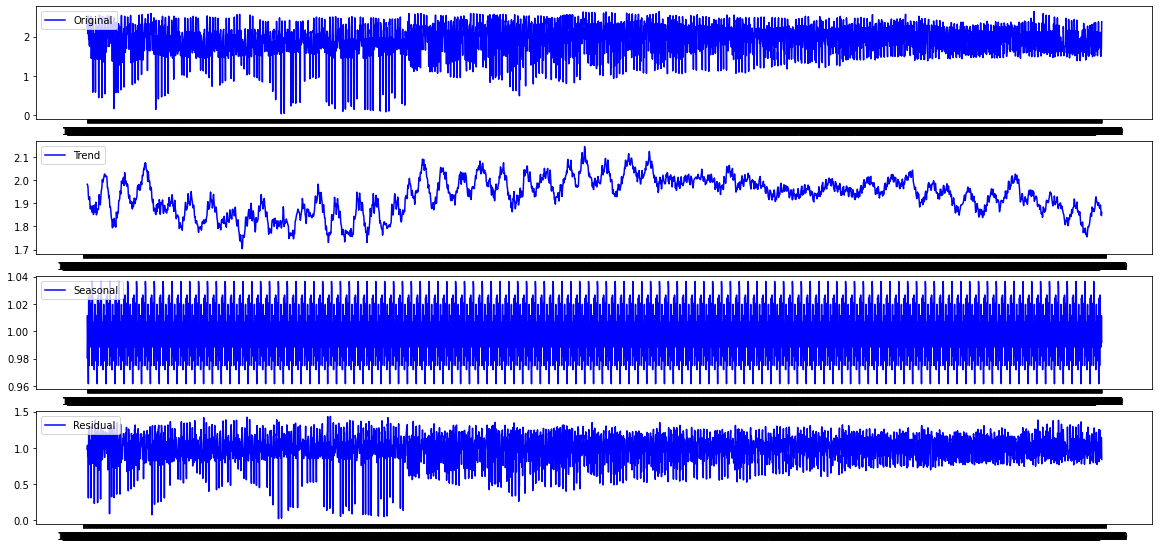

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(511)
plt.plot(data1, label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(512)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(513)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left')
plt.subplot(514)
plt.plot(residual, label='Residual', color='blue')
plt.legend(loc='upper left')
plt.show()

## LSTM

In [ ]:
dataset=data['T10YIE'].values

In [ ]:
dataset.shape

(3435,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
import numpy as np

In [ ]:
# Data preprocessing
measure=MinMaxScaler(feature_range=(0,1))
def prepare_data(data):
  data=measure.fit_transform(np.array(data).reshape(-1,1))
  return data

In [ ]:
dataset=prepare_data(dataset)
dataset

array([[0.87692308],
       [0.88076923],
       [0.87692308],
       ...,
       [0.88076923],
       [0.86538462],
       [0.86538462]])

In [ ]:
# Train test split

train_thres=0.70
train_size=int(len(dataset)*0.70)
val_size=int((len(dataset)-train_size)*0.6)
test_size=int((len(dataset)-train_size)*0.4)

# the data
train=dataset[:train_size,:]
valid=dataset[train_size:train_size+val_size,:]
test=dataset[train_size+val_size:len(dataset),:]

In [ ]:
print("Shape of training set: {}".format(train.shape))
print("Shape of valid set: {}".format(valid.shape))
print("Shape of test set: {}".format(test.shape))

Shape of training set: (2404, 1)
Shape of valid set: (618, 1)
Shape of test set: (413, 1)


In [ ]:
def memory_window(data, memory_size):
  datax=[]
  datay=[]
  for i in range(len(data)-memory_size-1):
        #print(i)
        window = data[i:(i+memory_size), 0:]
        datax.append(window)
        datay.append(data[i+memory_size, 0:])
        
  return np.array(datax),np.array(datay)

In [ ]:
train_x,train_y=memory_window(train,7)
valid_x, valid_y=memory_window(valid,7)
test_x,test_y= memory_window(test,7)

In [ ]:
print("Shape of training set: {}".format(train_x.shape))
print("Shape of valid set: {}".format(valid_x.shape))
print("Shape of test set: {}".format(test_x.shape))

Shape of training set: (2396, 7, 1)
Shape of valid set: (610, 7, 1)
Shape of test set: (405, 7, 1)


In [ ]:
model_lstm= Sequential([
                        LSTM(units=256,return_sequences=True,
                        activation='tanh',
                        input_shape=train_x.shape[-2:]),
                        Dropout(0.2),
                        LSTM(units=64,activation='tanh',
                             return_sequences=True),
                        Dense(units=1, name='output_layer')                     
])

#Compiling the network
model_lstm.compile(optimizer='adam',
                   loss='mean_squared_error',
                   metrics='mean_squared_error'
                   )

In [ ]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 256)            264192    
_________________________________________________________________
dropout (Dropout)            (None, 7, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 64)             82176     
_________________________________________________________________
output_layer (Dense)         (None, 7, 1)              65        
Total params: 346,433
Trainable params: 346,433
Non-trainable params: 0
_________________________________________________________________


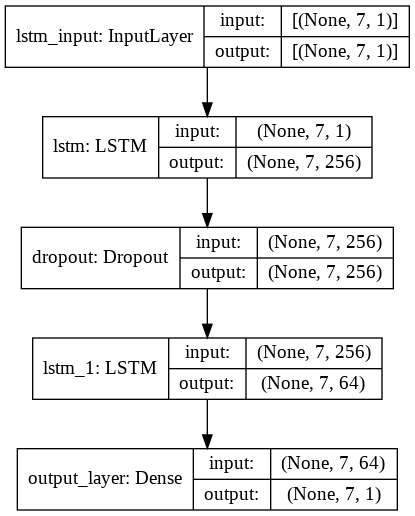

In [ ]:
keras.utils.plot_model(model_lstm,to_file="model1.png",
                      show_shapes=True,
                      show_dtype=False,
                      show_layer_names=True,
                      rankdir="TB",
                      expand_nested=False,
                      dpi=96,
                      layer_range=None,
                      )

In [ ]:
history_1=model_lstm.fit(train_x,train_y, validation_data=(valid_x,valid_y), epochs=100, batch_size=50, verbose=True)

Epoch 1/100
48/48 [==============================] - 10s 30ms/step - loss: 0.1300 - mean_squared_error: 0.1300 - val_loss: 0.0354 - val_mean_squared_error: 0.0354
Epoch 2/100
48/48 [==============================] - 1s 12ms/step - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 3/100
48/48 [==============================] - 1s 12ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 4/100
48/48 [==============================] - 1s 12ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 6.4190e-04 - val_mean_squared_error: 6.4190e-04
Epoch 5/100
48/48 [==============================] - 1s 12ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 4.6722e-04 - val_mean_squared_error: 4.6722e-04
Epoch 6/100
48/48 [==============================] - 1s 12ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 4.4763e-04 - val_mean_squared_error: 4.4763e-04
Epo

In [ ]:
# Predicting the data using the model
pred_train=model_lstm.predict(train_x)
pred_valid=model_lstm.predict(valid_x)

In [ ]:
pred_valid=measure.inverse_transform(np.array(pred_valid[0:,0]).reshape(-1,1))

In [ ]:
pred_test=model_lstm.predict(test_x)
pred_test=measure.inverse_transform(np.array(pred_test[0:,0]).reshape(-1,1))
y_true=measure.inverse_transform(np.array(test_y).reshape(-1,1))

In [ ]:
pred_test[0:,0].shape, y_true.shape

((405,), (405, 1))

In [ ]:
y_tr_=pd.DataFrame(y_true,columns=['y_true'])
pred_=pd.DataFrame(pred_test,columns=['pred_test'])
pred_df=pd.concat([y_tr_,pred_],axis=1)
pred_df['diff']=(pred_df['pred_test']-pred_df['y_true'])**2
pred_df.head(250)

,y_true,pred_test,diff
0,1.65,1.639187,0.000117
1,1.66,1.620026,0.001598
2,1.67,1.629605,0.001632
3,1.66,1.648770,0.000126
4,1.65,1.658355,0.000070
...,...,...,...
245,2.19,2.052423,0.018927
246,2.17,2.052423,0.013824
247,2.21,2.052423,0.024831
248,2.22,2.100574,0.014262


In [ ]:
import math

In [ ]:
classical_lstm_rmse=math.sqrt(mean_squared_error(y_true,pred_test))
classical_lstm_rmse

0.12318845340638651

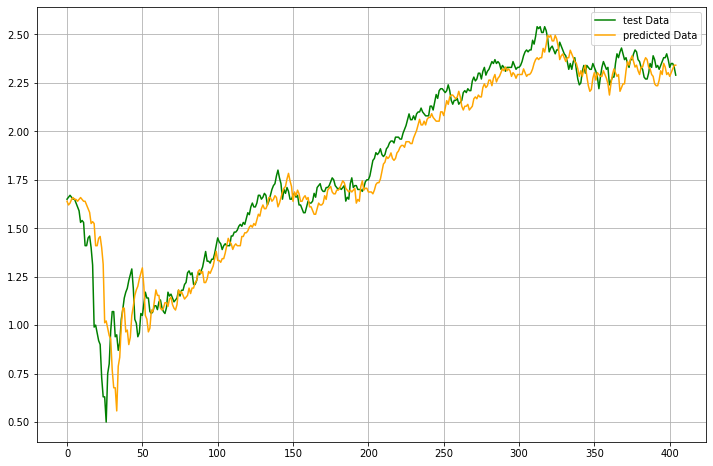

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(y_true, color='green',label='test Data')
plt.plot(pred_test, color='orange',label='predicted Data')
plt.grid()
plt.legend()

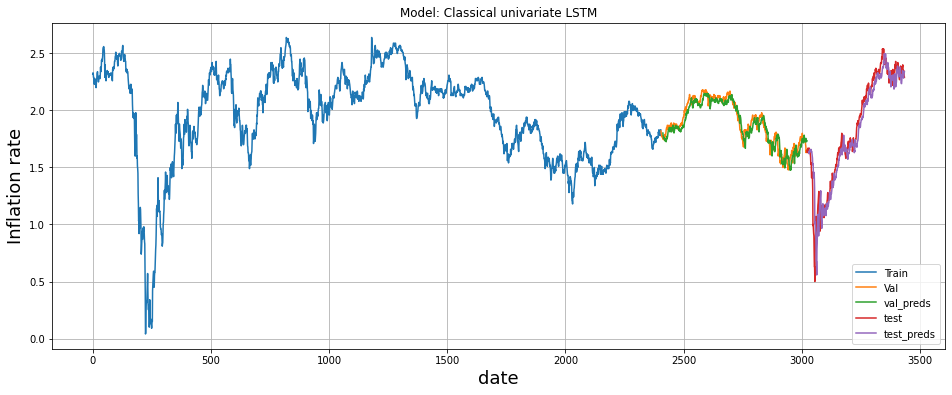

In [ ]:
# the data
train_data=data[['DATE','T10YIE']].iloc[:train_size,:]
valid_data=data[['DATE','T10YIE']].iloc[train_size:train_size+val_size,:]
test_data=data[['DATE','T10YIE']].iloc[train_size+val_size:len(dataset),:]

a = np.empty((len(test_data)-len(pred_test),1))
b= np.empty((len(valid_data)-len(pred_valid),1))
a[:] = np.nan
b[:]=np.nan
pred_test_data=np.concatenate((a,pred_test),axis=0)
pred_valid_data=np.concatenate((b,pred_valid),axis=0)

valid_data['predictions'] = pred_valid_data
test_data['predictions'] = pred_test_data

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model: Classical univariate LSTM')
plt.xlabel('date', fontsize=18)
plt.ylabel('Inflation rate', fontsize=18)
plt.plot(train_data['T10YIE'])
plt.plot(valid_data[['T10YIE', 'predictions']])
plt.plot(test_data[['T10YIE', 'predictions']])
plt.legend(['Train', 'Val', 'val_preds','test','test_preds'], loc='lower right')
plt.grid()
plt.show()

In [ ]:
valid_data.shape

(618, 3)

In [ ]:
pred_valid.shape

(610, 1)

In [ ]:
model_ae=Sequential([
                       # Layer 1
                       LSTM(units=256, return_sequences=False,
                           input_shape=(train_x.shape[1],train_x.shape[2]),
                           #Use L2 regularizer
                           kernel_regularizer= tf.keras.regularizers.l2(0.001),
                           activation='tanh'),
                 
                       # In this case, the repeat vector works as a bridge b/w the encoder and the decoder
                       keras.layers.RepeatVector(train_x.shape[1]),
                       LSTM(units=256, return_sequences=True,
                            kernel_regularizer= keras.regularizers.l2(0.001),
                           activation='tanh'),
                       keras.layers.TimeDistributed(Dense(train_y.shape[1]))
                     ])
# Model compilation
model_ae.compile(optimizer='adam',
                   loss='mean_squared_error',
                   metrics=[tf.keras.metrics.MeanSquaredError()]
                  )

model_ae.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_60 (LSTM)               (None, 256)               264192    
_________________________________________________________________
repeat_vector_12 (RepeatVect (None, 7, 256)            0         
_________________________________________________________________
lstm_61 (LSTM)               (None, 7, 256)            525312    
_________________________________________________________________
time_distributed_12 (TimeDis (None, 7, 1)              257       
Total params: 789,761
Trainable params: 789,761
Non-trainable params: 0
_________________________________________________________________


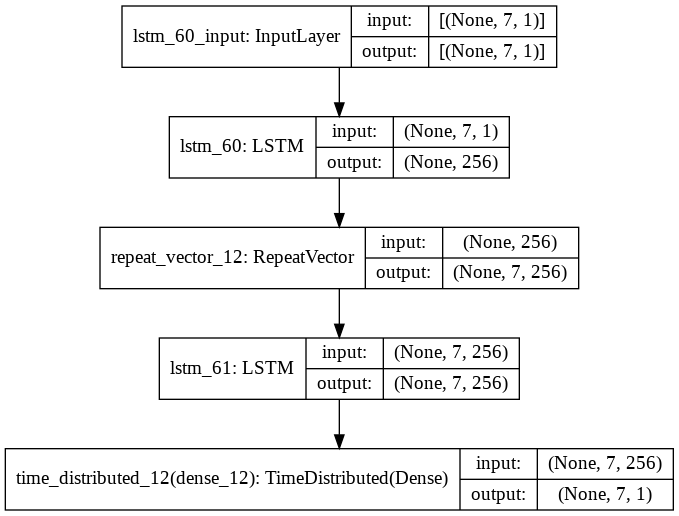

In [ ]:
keras.utils.plot_model(model_ae,to_file="model_ae.png",
                      show_shapes=True,
                      show_dtype=False,
                      show_layer_names=True,
                      rankdir="TB",
                      expand_nested=False,
                      dpi=96,
                      layer_range=None,
                      )

In [ ]:
model_ae.fit(train_x,train_y, validation_data=(valid_x,valid_y), epochs=100, batch_size=70, verbose=True)

Epoch 1/100
35/35 [==============================] - 5s 39ms/step - loss: 0.3245 - mean_squared_error: 0.0705 - val_loss: 0.1402 - val_mean_squared_error: 0.0049
Epoch 2/100
35/35 [==============================] - 1s 14ms/step - loss: 0.0958 - mean_squared_error: 0.0035 - val_loss: 0.0632 - val_mean_squared_error: 6.0242e-04
Epoch 3/100
35/35 [==============================] - 1s 14ms/step - loss: 0.0513 - mean_squared_error: 0.0011 - val_loss: 0.0400 - val_mean_squared_error: 2.6287e-04
Epoch 4/100
35/35 [==============================] - 1s 15ms/step - loss: 0.0341 - mean_squared_error: 9.1929e-04 - val_loss: 0.0272 - val_mean_squared_error: 2.5187e-04
Epoch 5/100
35/35 [==============================] - 1s 15ms/step - loss: 0.0236 - mean_squared_error: 9.3459e-04 - val_loss: 0.0188 - val_mean_squared_error: 2.8631e-04
Epoch 6/100
35/35 [==============================] - 1s 14ms/step - loss: 0.0166 - mean_squared_error: 9.6432e-04 - val_loss: 0.0132 - val_mean_squared_error: 2.5554e

In [ ]:
# Predicting the data using the model
pred_train_ae=model_ae.predict(train_x)
pred_valid_ae=model_ae.predict(valid_x)

In [ ]:
pred_valid_ae=measure.inverse_transform(np.array(pred_valid_ae[0:,0]).reshape(-1,1))

pred_test_ae=model_ae.predict(test_x)
pred_test_ae=measure.inverse_transform(np.array(pred_test_ae[0:,0]).reshape(-1,1))
y_true=measure.inverse_transform(np.array(test_y).reshape(-1,1))

In [ ]:
ae_rmse=math.sqrt(mean_squared_error(y_true,pred_test_ae))
ae_rmse

0.09394910045870224

In [ ]:
if(classical_lstm_rmse>ae_rmse):
  print('True')
else:
  print('False')

True


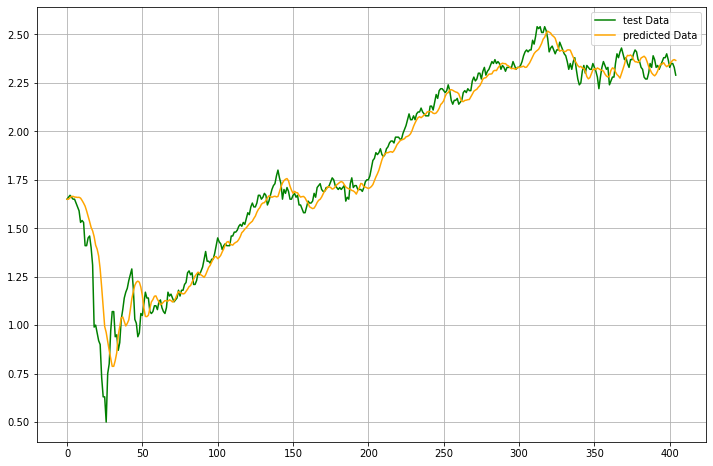

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(y_true, color='green',label='test Data')
plt.plot(pred_test_ae, color='orange',label='predicted Data')
plt.grid()
plt.legend()

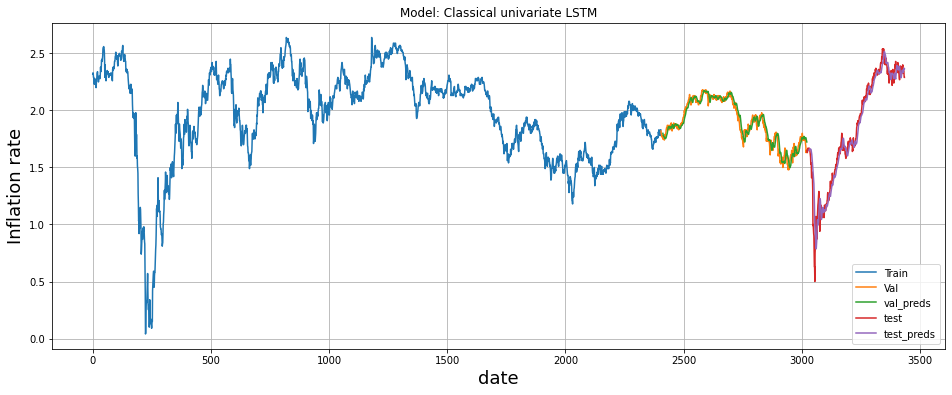

In [ ]:
# the data
train_data=data[['DATE','T10YIE']].iloc[:train_size,:]
valid_data=data[['DATE','T10YIE']].iloc[train_size:train_size+val_size,:]
test_data=data[['DATE','T10YIE']].iloc[train_size+val_size:len(dataset),:]

a = np.empty((len(test_data)-len(pred_test_ae),1))
b= np.empty((len(valid_data)-len(pred_valid_ae),1))
a[:] = np.nan
b[:]=np.nan
pred_test_data=np.concatenate((a,pred_test_ae),axis=0)
pred_valid_data=np.concatenate((b,pred_valid_ae),axis=0)

valid_data['predictions'] = pred_valid_data
test_data['predictions'] = pred_test_data

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model: Classical univariate LSTM')
plt.xlabel('date', fontsize=18)
plt.ylabel('Inflation rate', fontsize=18)
plt.plot(train_data['T10YIE'])
plt.plot(valid_data[['T10YIE', 'predictions']])
plt.plot(test_data[['T10YIE', 'predictions']])
plt.legend(['Train', 'Val', 'val_preds','test','test_preds'], loc='lower right')
plt.grid()
plt.show()